# Single Layer Perceptron

### Load Data

In [1]:
import pandas as pd

column_names = ['x1', 'x2', 'x3', 'x4', 'target']
iris_data = pd.read_csv('./iris_data.csv', header=None, names=column_names)

In [2]:
# Visualise the data in a table format
display(iris_data)

,x1,x2,x3,x4,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


### Data Preprocessing

In [3]:
iris_data['target_binary'] = iris_data['target'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)
display(iris_data.head())

,x1,x2,x3,x4,target,target_binary
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = iris_data.drop('target', axis=1)
y = iris_data['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)

Training set shape (X_train, y_train): (80, 5) (80,)
Validation set shape (X_val, y_val): (20, 5) (20,)


### Train SLP Model

In [5]:
import numpy as np

# Define variables as per initial values in spreadsheet
lr=.1
weights = np.array([0.5, 0.5, 0.5, 0.5])
bias = 0.5
input_size = 4
n_epoch = 5

In [6]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(inputs, weights, bias):
    return sigmoid(np.dot(inputs, weights) + bias)

def train(X_train, y_train, weights, bias, lr, n_epoch):
    errors_per_epoch = []
    accuracies_per_epoch = [] # List to store training accuracy per epoch
    for epoch in range(n_epoch):
        total_error = 0
        correct_predictions = 0 # Counter for training accuracy
        for i in range(len(X_train)):
            inputs = X_train.iloc[i].drop('target_binary').values
            target = X_train.iloc[i]['target_binary']

            prediction = predict(inputs, weights, bias)
            error = target - prediction
            total_error += error**2

            predicted_class = 1 if prediction >= 0.5 else 0
            if predicted_class == target:
                correct_predictions += 1

            weights += lr * error * inputs
            bias += lr * error

        accuracy = correct_predictions / len(X_train) # Calculate training accuracy
        errors_per_epoch.append(total_error)
        accuracies_per_epoch.append(accuracy) # Store training accuracy
        print(f"Epoch {epoch+1}, Training Error: {total_error:.4f}, Training Accuracy: {accuracy:.4f}")
    return weights, bias, errors_per_epoch, accuracies_per_epoch # Return training accuracies

def validate(X_val, y_val, weights, bias):
    validation_errors_per_epoch = []
    validation_accuracies_per_epoch = [] # List to store validation accuracy per epoch
    for epoch in range(n_epoch): # Loop through epochs for validation as well
        total_error = 0
        correct_predictions = 0
        for i in range(len(X_val)):
            inputs = X_val.iloc[i].drop('target_binary').values
            target = y_val.iloc[i]

            prediction = predict(inputs, weights, bias)
            predicted_class = 1 if prediction >= 0.5 else 0

            actual_binary_target = 1 if target == 'Iris-versicolor' else 0
            error = actual_binary_target - prediction # Calculate error for validation

            total_error += error**2

            if predicted_class == actual_binary_target:
                correct_predictions += 1

        accuracy = correct_predictions / len(X_val)
        validation_errors_per_epoch.append(total_error) # Store error per epoch for validation
        validation_accuracies_per_epoch.append(accuracy) # Store validation accuracy
        print(f"Epoch {epoch+1}, Validation Error: {total_error:.4f}, Validation Accuracy: {accuracy:.4f}")


    return validation_errors_per_epoch, validation_accuracies_per_epoch # Return validation errors and accuracies

# Train the model
trained_weights, trained_bias, training_errors, training_accuracies = train(X_train, y_train, weights, bias, lr, n_epoch)

# Validate the model
validation_errors, validation_accuracies = validate(X_val, y_val, trained_weights, trained_bias)

print("\nTraining Errors per Epoch:", training_errors)
print("Training Accuracies per Epoch:", training_accuracies) # Print training accuracies
print("Validation Errors per Epoch:", validation_errors)
print("Validation Accuracies per Epoch:", validation_accuracies) # Print validation accuracies

Epoch 1, Training Error: 6.6213, Training Accuracy: 0.9000
Epoch 2, Training Error: 0.3534, Training Accuracy: 1.0000
Epoch 3, Training Error: 0.1533, Training Accuracy: 1.0000
Epoch 4, Training Error: 0.0894, Training Accuracy: 1.0000
Epoch 5, Training Error: 0.0602, Training Accuracy: 1.0000
Epoch 1, Validation Error: 0.0067, Validation Accuracy: 1.0000
Epoch 2, Validation Error: 0.0067, Validation Accuracy: 1.0000
Epoch 3, Validation Error: 0.0067, Validation Accuracy: 1.0000
Epoch 4, Validation Error: 0.0067, Validation Accuracy: 1.0000
Epoch 5, Validation Error: 0.0067, Validation Accuracy: 1.0000

Training Errors per Epoch: [np.float64(6.62134437493375), np.float64(0.3533887884808388), np.float64(0.15329347364708532), np.float64(0.08935558157593311), np.float64(0.06019967967572762)]
Training Accuracies per Epoch: [0.9, 1.0, 1.0, 1.0, 1.0]
Validation Errors per Epoch: [np.float64(0.0067059672396019825), np.float64(0.0067059672396019825), np.float64(0.0067059672396019825), np.float

## Training & Validation Visualisation


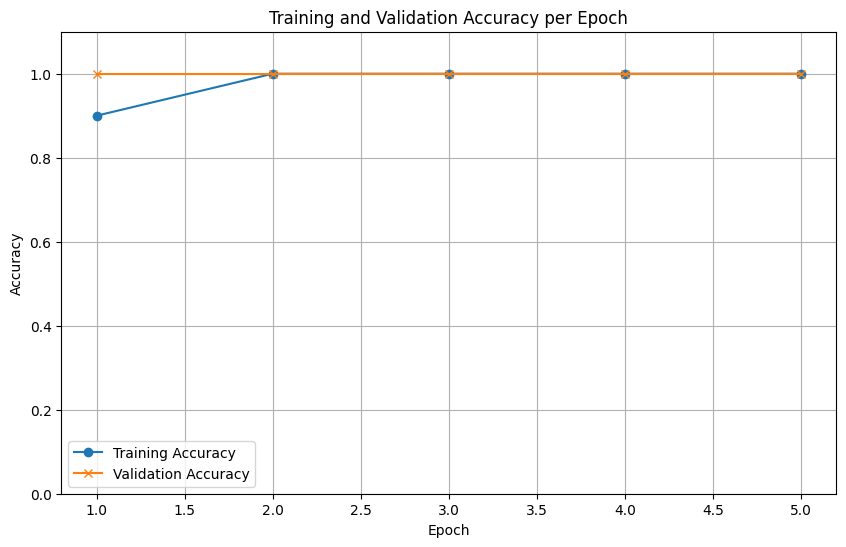

In [7]:
import matplotlib.pyplot as plt

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot Training Accuracy per Epoch
plt.plot(range(1, n_epoch + 1), training_accuracies, label='Training Accuracy', marker='o')

# Plot Validation Accuracy per Epoch
plt.plot(range(1, n_epoch + 1), validation_accuracies, label='Validation Accuracy', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1) # Set a reasonable y-axis limit for accuracy
plt.show()

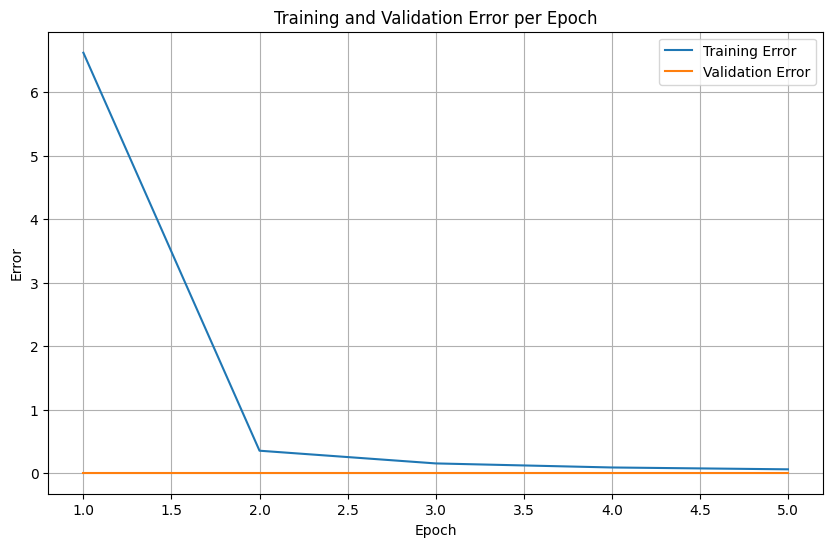

In [8]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plot Training Error per Epoch
plt.plot(range(1, n_epoch + 1), training_errors, label='Training Error')

# Plot Validation Error per Epoch
plt.plot(range(1, n_epoch + 1), validation_errors, label='Validation Error')


plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training and Validation Error per Epoch')
plt.legend()
plt.grid(True)
plt.show()

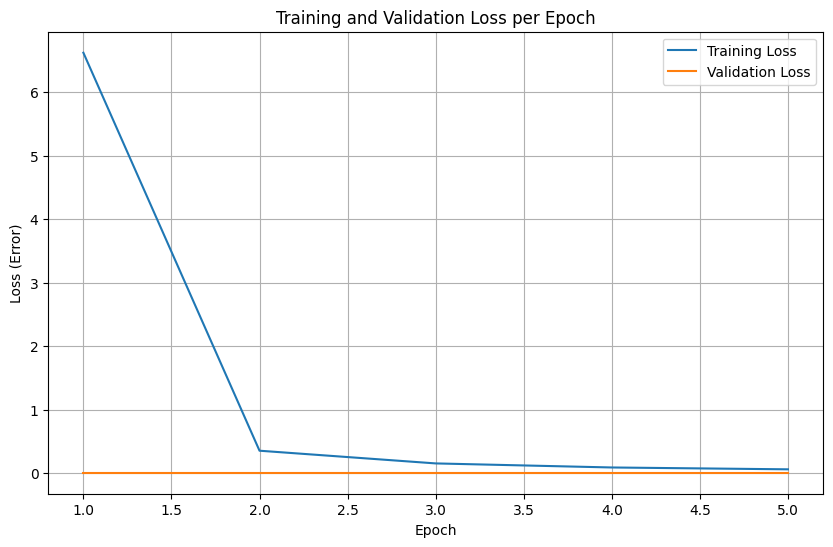

In [9]:
import matplotlib.pyplot as plt

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot Training Loss (Error)
plt.plot(range(1, n_epoch + 1), training_errors, label='Training Loss')

# Plot Validation Loss (Error)
plt.plot(range(1, n_epoch + 1), validation_errors, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss (Error)')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

### Conclusions

Since the validation has reached 100% since the first epoch, there's an indication that this  data set is too well separated and too simple for Single Layer Perceptron (SLP). To check this hypotheses, below is the dataset visualisation that indeed showing the separation very well between the two categories.

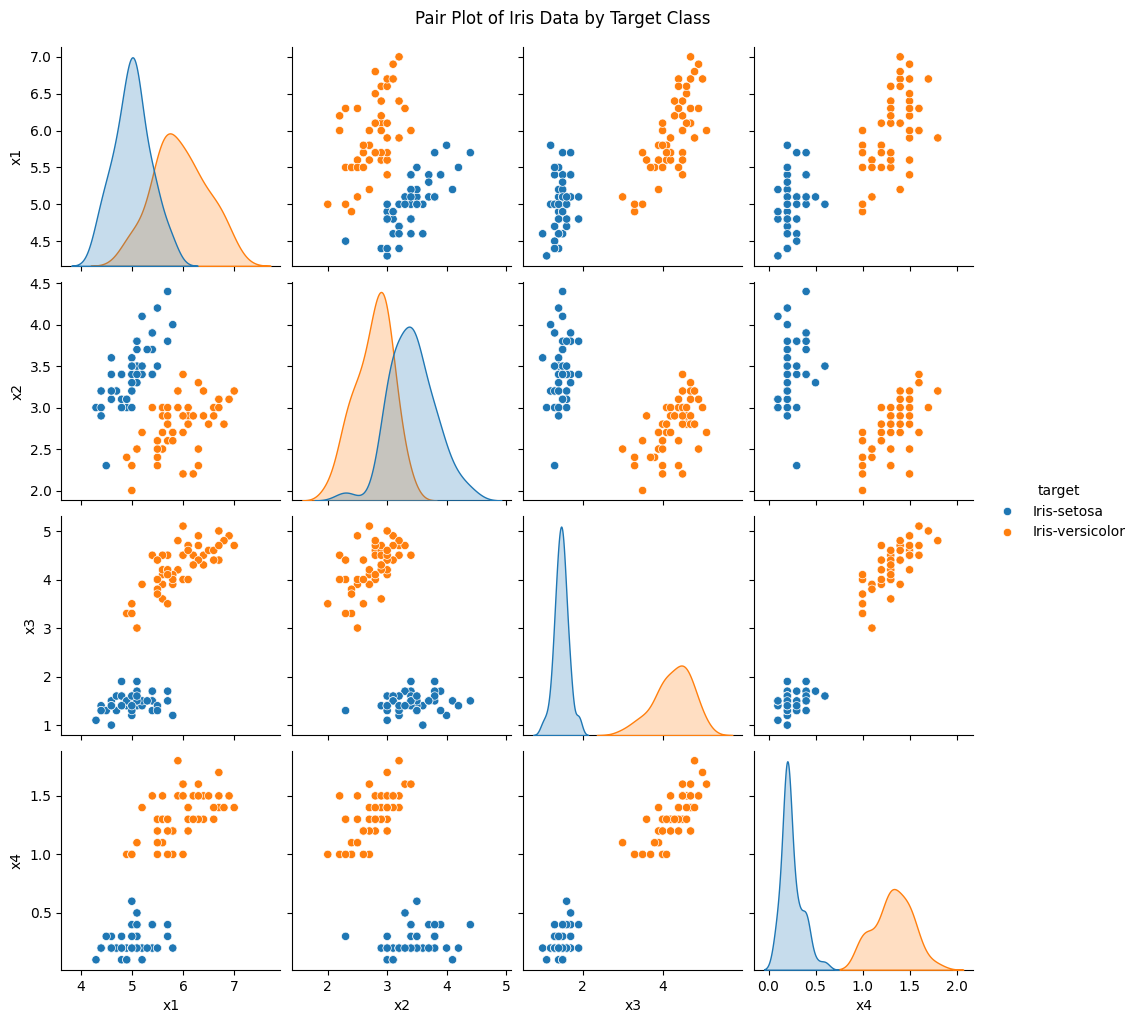

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pair plot to visualize the distribution of features for each target class
sns.pairplot(iris_data, hue='target', vars=['x1', 'x2', 'x3', 'x4'])
plt.suptitle('Pair Plot of Iris Data by Target Class', y=1.02)
plt.show()